<a href="https://colab.research.google.com/github/Nav2Nav/TP4/blob/main/TP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
import numpy as np
import tensorflow 
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.applications.xception import Xception, preprocess_input
from keras.models import Model

In [ ]:
from google.colab import drive
import os

# Accès Google Drive
drive.mount('/content/gdrive')
path = "/content/gdrive/MyDrive/cats_and_dogs/train"
path2 = "/content/gdrive/MyDrive/cats_and_dogs/test"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train_datagen =  keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.15,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function=preprocess_input,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        path,
        target_size=(300, 300),
        batch_size=16,
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        path2,
        target_size=(300, 300),
        batch_size=16,
        shuffle=False)

Found 563 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [ ]:
# Load pre-trained CNN - Here EfficientNetV2B0 trained on image-net dataset
base_model = Xception(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

In [ ]:
# Freeze all layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = base_model.output
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
predictions = Dense(2, activation='softmax', kernel_initializer='random_uniform')(x)


In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
A=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),

    epochs=2
)

Epoch 1/2
36/36 [==============================] - 284s 8s/step - loss: 0.4340 - accuracy: 0.9165
Epoch 2/2
36/36 [==============================] - 277s 8s/step - loss: 0.1066 - accuracy: 0.9858


In [ ]:
loss, accuracy = model.evaluate(test_generator)

print('Loss on test set:', loss)
print('Accuracy on test set:', accuracy)

9/9 [==============================] - 65s 7s/step - loss: 0.1157 - accuracy: 0.9643
Loss on test set: 0.11574903130531311
Accuracy on test set: 0.9642857313156128


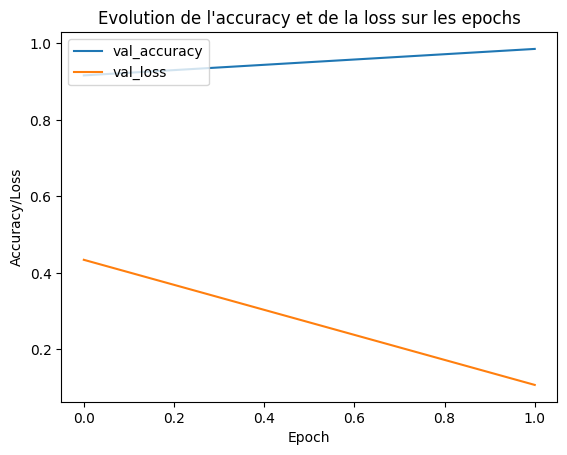

In [ ]:
plt.plot(A.history['accuracy'])
plt.plot(A.history['loss'])
plt.title('Evolution de l\'accuracy et de la loss sur les epochs')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['val_accuracy', 'val_loss', 'train_loss', 'val_loss'], loc='upper left')
plt.show()

9/9 [==============================] - 74s 8s/step


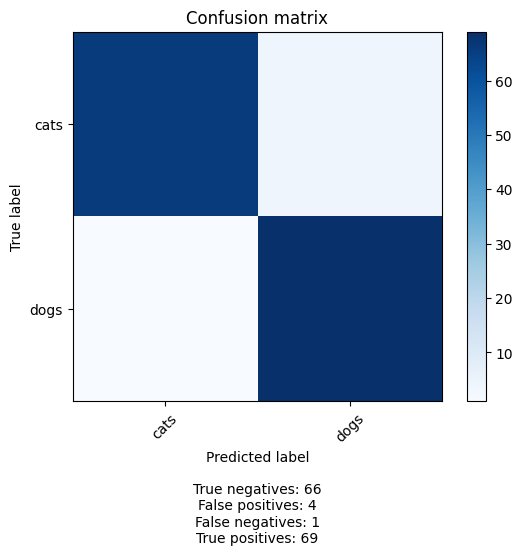

Accuracy: 0.9642857142857143
F1 score: 0.9642693073350009
Precision: 0.9651400531588633
Recall: 0.9642857142857143


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import itertools

# Get true labels
y_true_labels = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Compute number of true/false positives/negatives
tn, fp, fn, tp = cm.ravel()

# Plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices.keys(), rotation=45)
plt.yticks(tick_marks, test_generator.class_indices.keys())
plt.xlabel('Predicted label\n\nTrue negatives: {}\nFalse positives: {}\nFalse negatives: {}\nTrue positives: {}'.format(tn, fp, fn, tp))
plt.ylabel('True label')
plt.show()


# Print metrics
print('Accuracy:', accuracy_score(y_true_labels, y_pred_labels))
print('F1 score:', f1_score(y_true_labels, y_pred_labels, average='weighted'))
print('Precision:', precision_score(y_true_labels, y_pred_labels, average='weighted'))
print('Recall:', recall_score(y_true_labels, y_pred_labels, average='weighted'))